In [1]:
!pip install numpy
!pip install pandas

In [2]:
!pip install sklearn matplotlib

In [3]:
!pip install pandas_datareader
!pip install datetime

     |████████████████████████████████| 60 kB 3.3 MB/s 
     |████████████████████████████████| 251 kB 11.1 MB/s 


In [6]:
!pip install --upgrade pandas 
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 11.3 MB 5.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.


     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


**Multi Linear Regression**

In [29]:
#Importing libraries

#For fast numerical operations on matrices
import numpy as np

#For dataframes
import pandas as pd

#Linear regression library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#Plotting tool
import matplotlib.pyplot as plt


#date time
from datetime import datetime 

# For reading stock data from yahoo
from pandas_datareader import data
import fix_yahoo_finance as yf


In [31]:
# Linear regression

#Getting data from yahoo API

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

amazon_df = data.DataReader('AMZN', 'yahoo', start, end)

amazon_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-16,768.729980,763.820007,768.619995,764.039978,1604600,764.039978
2016-08-17,765.219971,759.200012,764.409973,764.630005,1891100,764.630005
2016-08-18,765.169983,760.599976,764.000000,764.460022,1458800,764.460022
2016-08-19,762.489990,756.890015,761.900024,757.309998,2343200,757.309998
2016-08-22,759.849976,752.099976,757.500000,759.479980,1679300,759.479980


In [32]:
#Adding the column name 'company_name' as 'AMAZON'
amazon_df['company_name']="AMAZON" 

In [33]:
amazon_df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2016-08-16,768.729980,763.820007,768.619995,764.039978,1604600,764.039978,AMAZON
2016-08-17,765.219971,759.200012,764.409973,764.630005,1891100,764.630005,AMAZON
2016-08-18,765.169983,760.599976,764.000000,764.460022,1458800,764.460022,AMAZON
2016-08-19,762.489990,756.890015,761.900024,757.309998,2343200,757.309998,AMAZON
2016-08-22,759.849976,752.099976,757.500000,759.479980,1679300,759.479980,AMAZON


In [34]:
#Dropping the column 'Adj close'
data=amazon_df
data=data.drop('Adj Close',axis=1)

In [35]:
data.reset_index(drop=True,inplace=True)
data.head()

,High,Low,Open,Close,Volume,company_name
0,768.729980,763.820007,768.619995,764.039978,1604600,AMAZON
1,765.219971,759.200012,764.409973,764.630005,1891100,AMAZON
2,765.169983,760.599976,764.000000,764.460022,1458800,AMAZON
3,762.489990,756.890015,761.900024,757.309998,2343200,AMAZON
4,759.849976,752.099976,757.500000,759.479980,1679300,AMAZON


In [36]:
#Dropping the 'company_name' column from the adjclose
data=data.drop('company_name',axis=1)
data.head()

,High,Low,Open,Close,Volume
0,768.729980,763.820007,768.619995,764.039978,1604600
1,765.219971,759.200012,764.409973,764.630005,1891100
2,765.169983,760.599976,764.000000,764.460022,1458800
3,762.489990,756.890015,761.900024,757.309998,2343200
4,759.849976,752.099976,757.500000,759.479980,1679300


In [37]:
data_X = data.loc[:,data.columns !=  'Close' ]
data_Y = data['Close']

In [38]:
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.25)

In [39]:
#Linear Regression
lreg=LinearRegression()
lreg.fit(train_X,train_y)
print(lreg.coef_)
print(lreg.intercept_)

[ 8.21176884e-01  7.66571104e-01 -5.88672799e-01 -1.48263833e-07]
2.6028033373906965


In [40]:
#Predict the values
predict_y=lreg.predict(test_X)
print('Prediction Score : ' , lreg.score(test_X,test_y))

Prediction Score :  0.9997560629935842


In [41]:
#Mean square error
error_lreg=mean_squared_error(test_y,predict_y)
print('Mean Square Error : ', error_lreg)

Mean Square Error :  168.0666642726872


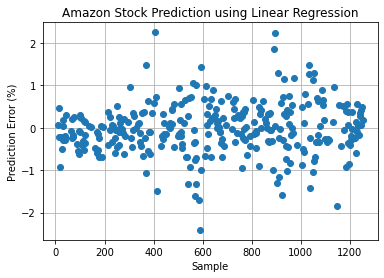

In [42]:
#Plot the predicted and the expected values
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set(xlabel='Sample',ylabel='Prediction Error (%)', title='Amazon Stock Prediction using Linear Regression')
ax.plot(((test_y-predict_y) / test_y)*100 ,marker = 'o',linestyle='')
fig.savefig('LRPlot.png')
plt.show()

In [43]:
#Finding the correlation
corr = data.corr(method='pearson')
corr

,High,Low,Open,Close,Volume
High,1.000000,0.999519,0.999702,0.999657,0.040702
Low,0.999519,1.000000,0.999604,0.999676,0.019544
Open,0.999702,0.999604,1.000000,0.999288,0.031962
Close,0.999657,0.999676,0.999288,1.000000,0.029746
Volume,0.040702,0.019544,0.031962,0.029746,1.000000


In [44]:
data = data.drop(['High','Low'],axis=1)
print(data)

             Open        Close   Volume
0      768.619995   764.039978  1604600
1      764.409973   764.630005  1891100
2      764.000000   764.460022  1458800
3      761.900024   757.309998  2343200
4      757.500000   759.479980  1679300
...           ...          ...      ...
1253  3343.610107  3341.870117  2148200
1254  3345.010010  3320.679932  2412600
1255  3331.449951  3292.110107  2947200
1256  3290.000000  3303.500000  2314100
1257  3305.669922  3293.969971  2052800

[1258 rows x 3 columns]


In [45]:
data_X = data.loc[:,data.columns !=  'Close' ]
data_Y = data['Close']
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.25)
regressor = LinearRegression()

#Feature scaling is present here as inbuilt feature
regressor.fit(train_X,train_y)
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)
print(np.mean(np.abs((test_y - predict_y) / test_y)) * 100)

Prediction Score :  0.998488497504513
Mean Squared Error :  1048.5377247321608
1.051206899044476


[ 9.98247507e-01 -1.00932150e-06]
7.191511961344759
0        764.039978
1        764.630005
2        764.460022
3        757.309998
4        759.479980
           ...     
1253    3341.870117
1254    3320.679932
1255    3292.110107
1256    3303.500000
1257    3293.969971
Name: Close, Length: 1258, dtype: float64


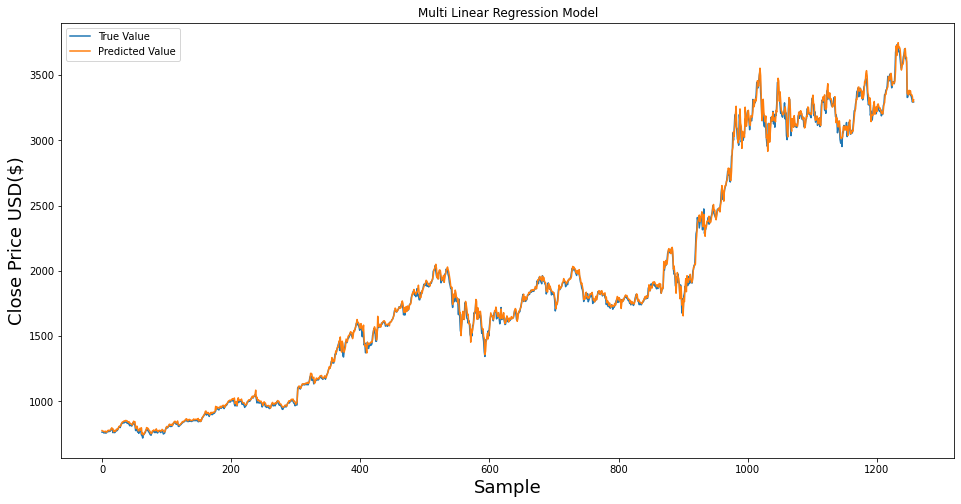

In [46]:
plt.figure(figsize=(16,8))
plt.title('Multi Linear Regression Model')
plt.xlabel('Sample',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
print(regressor.coef_)
print(regressor.intercept_)
print(data['Close'])
close_pred = []
actual_val = []

for i in range(len(data_X)):
    val = data_X['Open'][i]* regressor.coef_[0] - data_X['Volume'][i] * regressor.coef_[1] + regressor.intercept_ 
    close_pred.append(val)
    actual_val.append(data_Y[i])

plt.plot(actual_val)
plt.plot(close_pred)
plt.legend(['True Value','Predicted Value'])